In [ ]:
### env Seurat5
### date 0826

In [1]:
library("survminer")
library("ggplot2")
library("ggpubr")
library("magrittr")
library("survival")

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




In [7]:
inputPath = 'survival.csv'

In [8]:
data_fibrosis <- read.csv(inputPath)


In [9]:
data_fibrosis

group..1.drug.2.control.,time,state,sex..1.M.0.F.,age,CRP
<int>,<int>,<int>,<int>,<int>,<int>
1,387,0,1,43,2
1,168,1,1,64,25
1,301,0,1,45,10
1,303,0,1,47,19
1,196,1,0,63,22
1,104,1,0,68,29
1,284,0,1,54,12
1,193,1,0,57,21
1,273,1,1,62,12


In [16]:
fit <- survfit(Surv(time, state) ~ group..1.drug.2.control.	, data = data_fibrosis)
summary(fit)
### survfit()用来拟合生存曲线，Surv()用来指定生存时间和状态变量


Call: survfit(formula = Surv(time, state) ~ group..1.drug.2.control., 
    data = data_fibrosis)

                group..1.drug.2.control.=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   69     51       1    0.980  0.0194       0.9431        1.000
   90     50       1    0.961  0.0272       0.9090        1.000
  103     49       1    0.941  0.0329       0.8788        1.000
  104     48       1    0.922  0.0376       0.8507        0.998
  106     47       2    0.882  0.0451       0.7982        0.975
  120     45       2    0.843  0.0509       0.7490        0.949
  130     43       1    0.824  0.0534       0.7253        0.935
  132     42       1    0.804  0.0556       0.7020        0.921
  142     41       1    0.784  0.0576       0.6792        0.906
  144     40       1    0.765  0.0594       0.6567        0.890
  153     39       1    0.745  0.0610       0.6346        0.875
  156     38       1    0.725  0.0625       0.6128        0.859
  167     36       1    0.

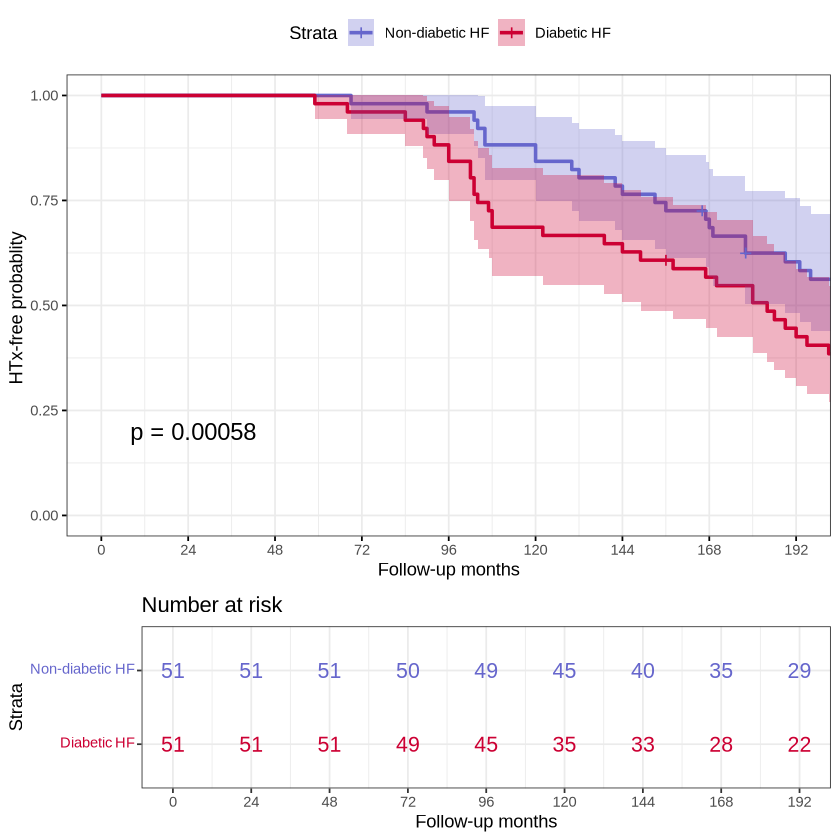

In [14]:
surv_plot <- ggsurvplot(fit, 
            data = data_fibrosis, 
            size = 1, # change line size 
            cex.lab=2,
            break.time.by = 24, # break X axis in time intervals by 500.
            xlim = c(0,192),
            axis.title.x =element_text(size=5), 
            axis.title.y = element_text(size=5),
            palette = c("#6666CC","#CC0033"),# custom color palettes 
            conf.int = TRUE, # Add confidence interval 
            pval = TRUE, # Add p-value 
            risk.table = TRUE, # Add risk table 
            xlab = "Follow-up months", # customize X axis label. 
            ylab="HTx-free probablity ",
            risk.table.col = "strata",# Risk table color by groups 
            legend.labs =  c("Non-diabetic HF","Diabetic HF"), # Change legend labels
            risk.table.height = 0.3, # Useful to change when you have multiple groups 
            ggtheme = theme_bw() # Change ggplot2 theme
)
surv_plot